<a href="https://colab.research.google.com/github/keerthanareddyyy/KMeans-Mall-Customers/blob/main/KMeans_Mall_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering on Mall Customers Dataset
This notebook performs K-Means clustering on mall customer data to segment customers based on their annual income and spending score.

In [1]:
# Step 1: Import necessary libraries
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


Step 2: Load the Dataset
We load the Mall Customers dataset to explore and prepare it for clustering.

In [7]:
import pandas as pd
# Step 2: Load the Mall Customers dataset from CSV file
data = pd.read_csv('Mall_Customers.csv')
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Step 3: Select Relevant Features
We focus on 'Annual Income' and 'Spending Score' for customer segmentation.

In [8]:
# Select features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Show first 5 rows of selected data
print(X.head())


   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [9]:
from sklearn.cluster import KMeans

# Step 3: Select features for clustering (e.g., Annual Income and Spending Score
# Select features (for example Age and Spending Score)
X = data.iloc[:, [2, 4]].values

# Create KMeans model (using 4 clusters as example)
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit model and get cluster labels
y_kmeans = kmeans.fit_predict(X)

Step 4: Use the Elbow Method to Find Optimal Number of Clusters
We use the Within-Cluster Sum of Squares (WCSS) to identify the ideal number of clusters.

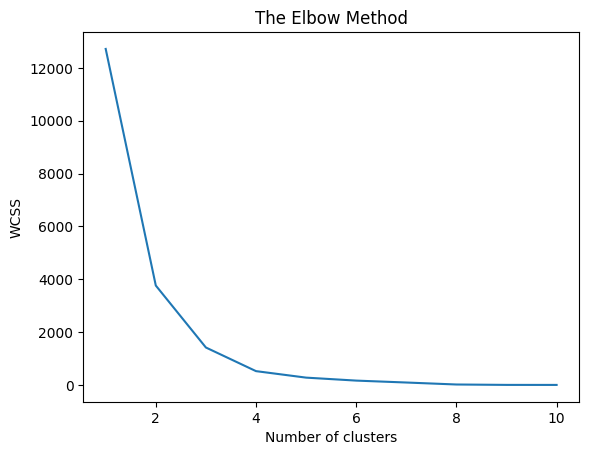

In [10]:
# Step 4: Use the Elbow method to find the optimal number of clusters (k)
wcss = []  # list to store within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#  Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Step 5: Apply K-Means Clustering
We apply K-Means with the chosen number of clusters (e.g., 5 based on elbow curve).

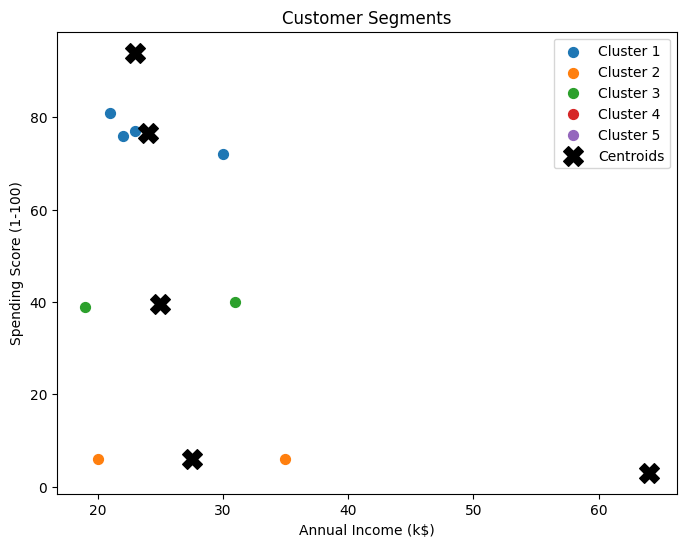

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 5: Apply K-Means with the optimal number of clusters
# Run KMeans with k=5 clusters and explicitly set n_init=10
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))

# Plot points belonging to each cluster with different colors
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, label=f'Cluster {i+1}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


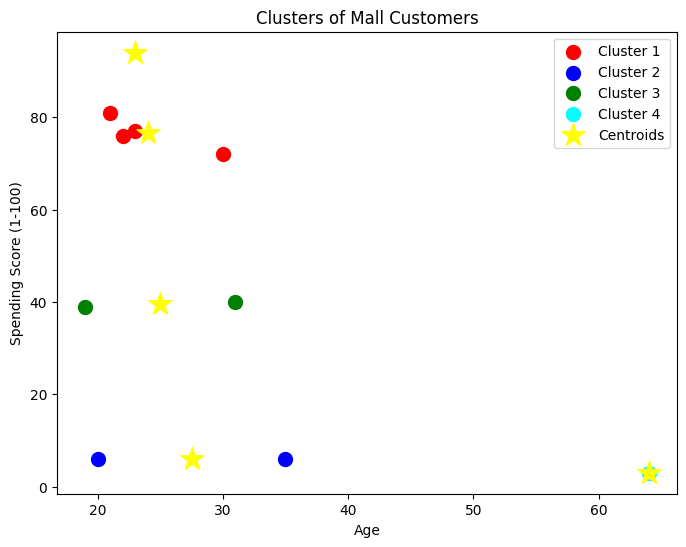

In [12]:
import matplotlib.pyplot as plt
# Step 6: Visualize the clusters
# Plotting the clusters and their centers
plt.figure(figsize=(8,6))

# Plot each cluster's points
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='*')

plt.title('Clusters of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Step 7: Save the Model (Optional)
You can save the trained K-Means model to reuse later without retraining.

In [13]:
# Print cluster centers to understand the average values in each cluster
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[24.  76.5]
 [27.5  6. ]
 [25.  39.5]
 [64.   3. ]
 [23.  94. ]]


Cluster Interpretation
Cluster 1: Mostly young customers with high spending scores.
Cluster 2: Middle-aged customers with moderate spending.
Cluster 3: Older customers with low spending scores.
Cluster 4: Other characteristics...

In [14]:

# Step 7: Save the model for future use
import joblib

# Save model to file
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [15]:
kmeans_loaded = joblib.load('kmeans_model.pkl')


Summary
We used K-Means to segment customers into 5 groups based on income and spending.
These insights can help the store tailor marketing strategies.